# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [0]:
#CodeRead

data_folder = '../Data_contest/dataset/'


genome_scores_df=pd.read_csv(data_folder+'genome_scores.csv') # Large (500MB)
movies_df=pd.read_csv(data_folder+'movies.csv')
train_df=pd.read_csv(data_folder+'train.csv') # Large 500MB
validation_df = pd.read_csv(data_folder+'validation.csv') 








In [0]:
#CodeRead

# create movie rating dataset from train

# Feature vector for the 10000 movies, each with a 1128 dimensional vector. 
# If a movie doesn't appear in genome_scores we make it simply the 0 vector.
X=np.zeros((10000,1128)) 
movies_with_featvecs=set(genome_scores_df['movieId'])
# The average rating, for each of the movies in the training set. 
# -1 if it is not in the train set.
rating_movies = -1*np.ones(10000) 

# Each movie, is labelled +1 or -1 based on whetherr it is a comedy or not
comedy = np.zeros(10000) 

for i in range(10000):
    if i not in movies_with_featvecs:
        continue
    temp = genome_scores_df[genome_scores_df['movieId']==i]
    feat_vec= np.array(temp['relevance'])
    X[i,:]=feat_vec

for i in range(10000):
    temp = train_df[train_df['movieId']==i]
    if len(temp)==0:
        continue
    ratings_curr_movies = temp['rating']
    rating_movies[i] = np.mean(ratings_curr_movies)

for i in range(10000):
    temp = movies_df[movies_df['movieId']==i]
    if len(temp)==0:
        continue
    temp = temp['genres'].values[0]
    temp = temp.split('|')
    comedy[i] = 'Comedy' in temp
    comedy[i] = 2*comedy[i] -1


In [0]:
np.array(train_df['rating']).mean()

# Problem 1. K-Nearest Neighbours

Run k-Nearest neighbours on the binary classification dataset below, for classifiying whether a given movie is a comedy or not. The train and test feature vectors are given by X_train, X_test and the train and test ratings are Y_train and Y_test. 

Run k-Nearest neighbours for different k values (1,2,4,8,16,32,64) and report accuracies in the next cell. 

In [0]:
#CodeWrite cell

X_train = np.array(X[:8000,])
X_test = np.array(X[8000:])

Y_train=np.array(comedy[:8000])
Y_test=np.array(comedy[:8000])



TextWrite cell. Report test accuracies for different k here.




# Problem 2: PCA and regression

Take the regression dataset below, and perform linear regression after doing PCA on the feature vector. 

For each K in [4,32,256,1024] take the top k components and report the mean squared error on the test set below. 

For each K you can choose the regularisation hyperparameter $\lambda$ for linear regression using a 80-20 split of the training set. 

For each K above, report the best lambda and the mean squared error for this best lambda in the cell below the next.




In [0]:
# CodeWrite

X_all = X[rating_movies>0]
Y_all = rating_movies[rating_movies>0]

X_train = np.array(X_all[:7000])
Y_train = np.array(Y_all[:7000])
X_test = np.array(X_all[7000:])
Y_test = np.array(Y_all[7000:])





TextWrite cell. Report best lambda and the mean squared error on the test set, for different K here.


# Problem 3: Baseline methods for collaborative filtering

Run the baseline methods discussed in class for collaborative filtering. Use the old train.csv to train and the newly provided validation.csv to report your mean squared errors. 


In [0]:
#CodeWrite


Textwrite. Give the MSE on the validation set for the baseline method.



# Problem 4. EM algorithm for Gaussian Mixture models

Take below 2 dimensional data, and run the GMM algorithm with k=3 components. The data is in the variable X, each row represents a data point.

Give the estimate of mean, covariance and component weights of all three components in the text cell after the next.



[7.39307931 6.56139693]


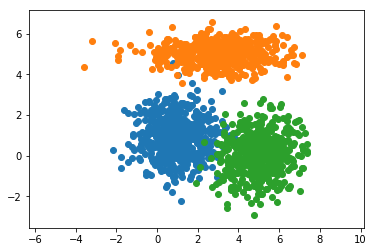

In [0]:
#CodeRead. Do not touch this cell.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(123)
mu1=np.array([[1.,1]])
mu2=np.array([[3.,5.]])
mu3=np.array([[5.,0.]])

Sigma1=np.array([[1.,0.],[0.,1.]])
Sigma2=np.array([[3.,0.],[0.,0.3]])
Sigma3=np.array([[1.,0.],[0.,1.]])

A1=np.linalg.cholesky(Sigma1)
A2=np.linalg.cholesky(Sigma2)
A3=np.linalg.cholesky(Sigma3)


X1=np.dot(np.random.randn(500,2),A1)+mu1
X2=np.dot(np.random.randn(500,2),A2)+mu2
X3=np.dot(np.random.randn(500,2),A1)+mu3

plt.axis('equal')
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])


X=np.concatenate((X1,X2,X3),axis=0)

np.random.shuffle(X)
del mu1
del mu2
del mu3
del Sigma1
del Sigma2
del Sigma3
print(np.max(X,axis = 0))

In [0]:
#CodeWrite
import math
mean1 = [2.0,3.0]
mean2 = [3.0,4.0]
mean3 = [4.0,5.0]
mean = []
mean.append(mean1)
mean.append(mean2)
mean.append(mean3)

mean = np.array(mean)

variance1 = [[1.0,3.0],[2.0,9.0]]
variance2 = [[9.0,0.9],[5.0,9.0]]
variance3 = [[10.0,9.0],[8.0,4.0]]
variance = []
variance.append(variance1)
variance.append(variance2)
variance.append(variance3)

variance = np.array(variance)

prior1 = 0.5
prior2 = 0.2
prior3 = 0.3

prior = []
prior.append(prior1)
prior.append(prior2)
prior.append(prior3)

prior = np.array(prior)

threshold = .000005

def shouldIstop(meanold, meannew):
  sum=0.0
  for i  in range(len(meannew)):
    for j in range(2):
      sum=sum + (meanold[i][j]- meannew[i][j])**2
#   print("qdbqbdkewbdkwedbjke",sum)
  sum = sum**.5
#   print(sum)
  if sum<threshold:
    return True
  else:
    return False
    
  
def probability_function(data_point,mu,sigma):
#     print(mu,sigma)
    x_minus_mu = np.subtract(data_point,mu)
    x_minus_mu_transpose = np.subtract(data_point,mu).T
    sigma_inverse = np.linalg.inv(sigma)
    product = np.dot(x_minus_mu_transpose,sigma_inverse)
    liklihood =(1.0/(np.sqrt(np.absolute(np.linalg.det(sigma)))))*math.exp(-0.5*np.dot(product,x_minus_mu ))
#     print(liklihood)
    return liklihood

count = 0
def calculate_new(mean,variance,prior):
  
    global X
    pointProbabilityinclass = []
    for data in X:
      l = []
      for k in range(3):
        c1 = probability_function(data,mean[k],variance[k])*prior[k]
        l.append(c1)
      c= l[0]+l[1]+l[2]
      bro = []
      for p in l:
        bro.append(p/c)
      pointProbabilityinclass.append(bro)
#     print(pointProbabilityinclass)

    s1 = 0.0
    s2 = 0.0
    s3=0.0
    p1=np.array([0.0,0.0])
    p2=np.array([0.0,0.0])
    p3=np.array([0.0,0.0])
    for  i in range(len(X)):
      s1 = s1 + pointProbabilityinclass[i][0]
      s2 = s2 + pointProbabilityinclass[i][1]
      s3 = s3 + pointProbabilityinclass[i][2]

      p1 = np.add(p1,np.array(X[i])*pointProbabilityinclass[i][0])
      p2 = np.add(p2,np.array(X[i])*pointProbabilityinclass[i][1])
      p3 = np.add(p3,np.array(X[i])*pointProbabilityinclass[i][2])
      


    pi1 = s1/len(X)
    pi2 = s2/len(X)
    pi3 = s3/len(X)
    mu1 = p1/s1
    mu2 = p2/s2
    mu3 = p3/s3

    r1=np.array([[0.0,0.0],[0.0,0.0]])
    r2=np.array([[0.0,0.0],[0.0,0.0]])
    r3=np.array([[0.0,0.0],[0.0,0.0]])
    for i in range(len(X)):
      yo = np.asmatrix(np.subtract(np.array(X[i]),np.array(mu1)))
      yo_transpose = yo.T
      jo = np.matmul(yo_transpose,yo)
      r1 = np.add(r1,pointProbabilityinclass[i][0]*(jo))
      
      
      yo = np.asmatrix(np.subtract(np.array(X[i]),np.array(mu2)))
      yo_transpose = yo.T
      jo = np.matmul(yo_transpose,yo)
      r2 = np.add(r2,pointProbabilityinclass[i][1]*(jo))
      
      
      yo = np.asmatrix(np.subtract(np.array(X[i]),np.array(mu3)))
      yo_transpose = yo.T
      jo = np.matmul(yo_transpose,yo)
      r3 = np.add(r3,pointProbabilityinclass[i][2]*(jo))
     

    sigm1 = np.array(r1)/s1
    sigm2 = np.array(r2)/s2
    sigm3 = np.array(r3)/s3
    meannew =[] 
    meannew.append(mu1)
    meannew.append(mu2)
    meannew.append(mu3)
    meannew = np.array(meannew)
#     print("mean",meannew)
    variance =[]
    variance.append(sigm1)
    variance.append(sigm2)
    variance.append(sigm3)
    variance = np.array(variance)
#     print("variance",variance)
    prior = []
    prior.append(pi1)
    prior.append(pi2)
    prior.append(pi3)
    prior = np.array(prior)
#     print("prior",prior)

    return meannew, variance,prior

    
    
        
def EMAlgorithm(mean,variance, prior):

  meannew ,variancenew, priornew = calculate_new(mean,variance,prior)
  print(priornew)
#   print("EM",meannew ,variancenew, priornew)
  if shouldIstop(mean,meannew) :
      return meannew,variancenew,priornew
  else:
      return EMAlgorithm(meannew,variancenew, priornew)
      
      
      
x = EMAlgorithm(mean,variance, prior)
print(x)
      
  
  
        
          
        
          
        
      
  
  
  


[0.2487664  0.08830555 0.66292805]
[0.23041548 0.10106701 0.66851752]
[0.22637867 0.1143158  0.65930553]
[0.22772686 0.12710467 0.64516847]
[0.23189903 0.13928502 0.62881595]
[0.23823809 0.15088739 0.61087452]
[0.24656952 0.1622519  0.59117858]
[0.25567832 0.17559832 0.56872336]
[0.25909499 0.20009159 0.54081342]
[0.25061817 0.23826205 0.51111979]
[0.23718132 0.27428242 0.48853627]
[0.22268001 0.30450808 0.47281191]
[0.21609025 0.32286224 0.46104751]
[0.22155693 0.33080131 0.44764177]
[0.23349793 0.33332232 0.43317974]
[0.24721746 0.33397134 0.4188112 ]
[0.26106174 0.33415157 0.40478669]
[0.27434645 0.33421032 0.39144323]
[0.28661027 0.33423445 0.37915527]
[0.29750527 0.33424882 0.36824591]
[0.30677424 0.33426048 0.35896528]
[0.31428382 0.33427108 0.3514451 ]
[0.32007898 0.33428062 0.3456404 ]
[0.32437771 0.33428864 0.34133364]
[0.32748491 0.33429484 0.33822025]
[0.3296992  0.33429934 0.33600146]
[0.33126651 0.33430249 0.334431  ]
[0.33237275 0.33430468 0.33332258]
[0.3331528 0.3343062

In [0]:
  
def probability_function(data_point,mu,sigma):
    print(mu,sigma)
    x_minus_mu = np.subtract(data_point,mu)
    print("x_minus_mu",x_minus_mu)
    x_minus_mu_transpose = np.subtract(data_point,mu).T
    print("x_minus_mu_transpose",x_minus_mu_transpose)
    sigma_inverse = np.linalg.inv(sigma)
    print("sigma_inverse",sigma_inverse)
    
    product = np.dot(x_minus_mu_transpose,sigma_inverse)
    print("product",product)
    det = np.linalg.det(sigma)
    print("det",det)
    sq = np.sqrt(np.absolute(det))
    print("sq",sq)
    liklihood =(1.0/(sq))*math.exp(-0.5*np.dot(product,x_minus_mu ))
    print("liklihood",liklihood)
    return liklihood
x = probability_function(np.array([2,4]),np.array([2,7]),np.array([[3,7],[8,0]]))
print(x)

[2 7] [[3 7]
 [8 0]]
x_minus_mu [ 0 -3]
x_minus_mu_transpose [ 0 -3]
sigma_inverse [[ 0.          0.125     ]
 [ 0.14285714 -0.05357143]]
product [-0.42857143  0.16071429]
det -55.99999999999997
sq 7.483314773547881
liklihood 0.1700599228316098
0.1700599228316098


In [0]:
import numpy as np
r = np.array([[1,2],[3,4]])
b = np.array([[1,2],[3,4]])
print(b)
c = np.dot(r,b)
print(c)
d = np.matmul(r,b)
print(d)

[[1 2]
 [3 4]]
[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


TextWrite. Give the estimated $\pi_k$, $\mu_k$ and $\Sigma_k$ for $k\in\{1,2,3\}$


|                        | $\mu_k$                                    |                     $\Sigma_k$       |   $\pi_k$       | 
|---------------------|------------------------------------------------|-----------------------------------------------|--------------------|
|K1                   |  [0.97820158, 0.94156684]     |  [1.07216057, -0.00863107]  | 0.3350191  |
|                        |                                                      |  [-0.00863107,  0.96634115] |                      |
|K2                   |  [2.98449442, 5.00983808]     | [ 2.82427795,  0.00670476]  |0.33430977 |
|                        |                                                      |[ 0.00670476,  0.27035455]  |                       |
|K3                   |  [5.00399982, 0.03310815]     | [ 0.96928108,  0.09717377]] |0.33067113 |
|                        |                                                      | [ 0.09717377,  0.94752136]  |                      |


